In [3]:
import os
os.chdir('/content/drive/MyDrive/')

In [4]:
import tensorflow as tf
import pickle
from ResidualAttentionNetwork import ResidualAttentionNetwork
from matplotlib import pyplot as plt

In [5]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True,
                                                          validation_split=0.2)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train - x_train.mean()
x_test = x_test - x_test.mean()

datagen.fit(x_train)

input_shape = x_train.shape[1:]
output_size = 10

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
def scheduler(epoch, lr):
    if epoch == 160:
        return lr * 0.1
    else:
        return lr

model = ResidualAttentionNetwork(input_shape=input_shape, output_size=output_size).Attention_92()
model.compile(tf.keras.optimizers.SGD(lr=1e-1, decay=1e-4, momentum=0.9, nesterov=True, clipvalue=0.5),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

callback_accuracy = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
callback_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
                    epochs=200, callbacks=[callback_accuracy,callback_lr])

In [8]:
"""
:dataset: Cifar10
:model Attention-92 with pre-activation Residual Unit, Attention Residual Learning
:param optimizer: Adam
:param batch_size = 64
:param epochs = 200
"""
def scheduler(epoch, lr):
    if epoch % 40 == 0:
        return lr * 0.5
    else:
        return lr

model = ResidualAttentionNetwork(input_shape=input_shape, output_size=output_size).Attention_92()
model.compile(tf.keras.optimizers.SGD(lr=1e-1, decay=1e-4, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

callback_accuracy = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
callback_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
                    epochs=200, callbacks=[callback_accuracy,callback_lr])

Epoch 1/200
625/625 [==============================] - 76s 102ms/step - loss: 2.1371 - accuracy: 0.2136 - val_loss: 1.8822 - val_accuracy: 0.2905
Epoch 2/200
625/625 [==============================] - 61s 98ms/step - loss: 1.8411 - accuracy: 0.3050 - val_loss: 1.9958 - val_accuracy: 0.2714
Epoch 3/200
625/625 [==============================] - 61s 98ms/step - loss: 1.6802 - accuracy: 0.3689 - val_loss: 2.1932 - val_accuracy: 0.2251
Epoch 4/200
625/625 [==============================] - 60s 95ms/step - loss: 1.5895 - accuracy: 0.4079 - val_loss: 2.2392 - val_accuracy: 0.2795
Epoch 5/200
625/625 [==============================] - 59s 94ms/step - loss: 1.5230 - accuracy: 0.4357 - val_loss: 2.0770 - val_accuracy: 0.2396
Epoch 6/200
625/625 [==============================] - 59s 94ms/step - loss: 1.6161 - accuracy: 0.4005 - val_loss: 2.1316 - val_accuracy: 0.2783
Epoch 7/200
625/625 [==============================] - 58s 93ms/step - loss: 1.5628 - accuracy: 0.4221 - val_loss: 2.4533 - val_a

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.6954 - accuracy: 0.7705


[0.6953797936439514, 0.7705000042915344]

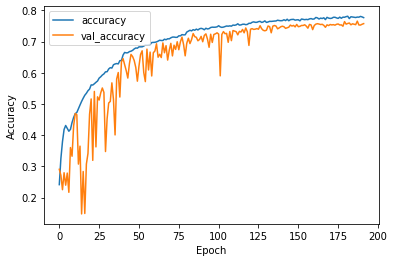

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

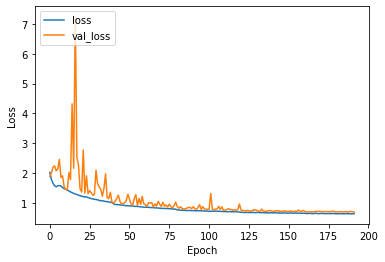

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [16]:
model.save('cifar10_att92_adam_arl_resnet_200epoch_val77.h5')